Vec3(0.09838432607747238, 0.1829303176818422, 0.994159852392236) (0.784495327727712, 0.44643606992212037)
Vec3(0.4572503896996233, -0.1599746509199525, 0.874831522170173)
(0.034178466277098675, 0.033385844566298825) (0.017510640046518648, 0.015507006239013549, <vec3.Vec3 object at 0x1086b4cc0>, <vec3.Vec3 object at 0x1086b41d0>)
Vec3(-0.6929825407141077, 0.02844129309003318, 0.7203931503788655)
(0.023793302522456247, 0.017351052307680453) (0.02379330252245624, 0.017351052307680453, <vec3.Vec3 object at 0x108c45dd8>)


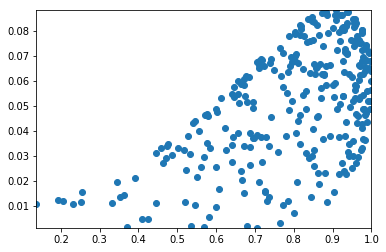

In [30]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;
zipin= brdf.ZipinBrdf(.3, .3);
wo = vec3.Vec3(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1));
u = (random.uniform(0,1), random.uniform(0, 1));
print(wo, u)
zsample =zipin.Sample(wo, u);
zeval = zipin.Eval(wo, zsample[2]);
print(zsample[2])
print(zeval, zsample);

beckman = brdf.Brdf(.3, .3);
bsample = beckman.Sample(wo, u);
beval = beckman.Eval(wo, bsample[2]);
print(bsample[2]);
print(beval, bsample);


theta_o = math.pi /9.0;
phi_o = math.pi * 2.0 * random.uniform(0,1);
wo = vec3.Vec3(math.sin(theta_o) * math.sin(phi_o), math.sin(theta_o)* math.cos(phi_o), math.cos(theta_o));
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
for i in range(300):
    u = (random.uniform(0, 1), random.uniform(0, 1));
    zsample = zipin.Sample(wo, u);
    bsample = beckman.Sample(wo, u)
    zsamples.append(zsample);
    bsamples.append(bsample)
zsamples.sort(key=lambda x:x[2].z);
bsamples.sort(key=lambda x:x[2].z);

for s in bsamples:
    xdata.append(s[2].z);
    zdata.append(s[0]);
    

fig, ax = plt.subplots();
#ax.plot(xdata, zdata)
ax.plot(xdata, zdata, 'o');
plt.autoscale(True, 'both', True)
plt.show()   


NameError: name 'math' is not defined

0.860238485217282


1.4448341712182988 -0.46579906503072


0.8668083907638165


0.2447587765468946 0.24475877654689454
